# PyTorch for CIFAR10
We test VGG classifier.
First init some basic environment.

In [1]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

# VGG16 classifier

In [2]:
import torch.optim as optim
import torch.nn as nn
from cifar10.tnt_solver import *
from cifar10.classifiers.vgg import VGG16

model = VGG16()
print(model)

_VGG(
  (layers): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256, kernel_size=(3, 3),

# train

In [3]:
%%time
opt = optim.SGD(model.parameters(), lr=1e-1, momentum=0.9, weight_decay=5e-4, nesterov=True)
loss_fn = F.cross_entropy
lr_scheduler = optim.lr_scheduler.ReduceLROnPlateau(opt, 'min', factor=0.5)

# lr_scheduler = None
history = main(model, opt, epoch=150, loss_fn=loss_fn, lr_scheduler=lr_scheduler)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Epoch: 1/150, lr:1.00e-01
100%|██████████| 625/625 [01:34<00:00,  6.61it/s, loss:2.1659, acc:17.2825%]
Val loss: 1.9204, accuracy: 22.63%
Epoch: 2/150, lr:1.00e-01
100%|██████████| 625/625 [01:33<00:00,  6.71it/s, loss:1.7787, acc:29.9875%]
Val loss: 1.8809, accuracy: 30.41%
Epoch: 3/150, lr:1.00e-01
100%|██████████| 625/625 [01:34<00:00,  6.65it/s, loss:1.4779, acc:44.4275%]
Val loss: 1.4511, accuracy: 47.66%
Epoch: 4/150, lr:1.00e-01
100%|██████████| 625/625 [01:34<00:00,  6.61it/s, loss:1.2184, acc:56.7425%]
Val loss: 1.3100, accuracy: 55.03%
Epoch: 5/150, lr:1.00e-01
100%|██████████| 625/625 [01:34<00:00,  6.60it/s, loss:1.0255, acc:64.5025%]
Val loss: 1.4454, accuracy: 52.47%
Epoch: 6/150, lr:1.00e-01
100%|██████████| 625/625 [01:34<00:00,  6.61it/s, loss:0.9266, acc:68.7100%]
Val loss: 0.9666, accuracy: 65.56%
Epoch: 7/150, lr:1.00e-01
100%|██████████| 625/625 [01:34<

100%|██████████| 625/625 [01:33<00:00,  6.70it/s, loss:0.0300, acc:99.0300%]
Val loss: 0.3178, accuracy: 92.19%
Epoch: 60/150, lr:3.13e-03
100%|██████████| 625/625 [01:34<00:00,  6.63it/s, loss:0.0334, acc:98.9050%]
Val loss: 0.3098, accuracy: 91.96%
Epoch: 61/150, lr:3.13e-03
100%|██████████| 625/625 [01:32<00:00,  6.74it/s, loss:0.0297, acc:99.0300%]
Val loss: 0.3036, accuracy: 92.50%
Epoch: 62/150, lr:3.13e-03
100%|██████████| 625/625 [01:33<00:00,  6.67it/s, loss:0.0269, acc:99.1075%]
Val loss: 0.3240, accuracy: 91.92%
Epoch: 63/150, lr:3.13e-03
100%|██████████| 625/625 [01:33<00:00,  6.70it/s, loss:0.0277, acc:99.1250%]
Val loss: 0.3421, accuracy: 91.68%
Epoch: 64/150, lr:3.13e-03
100%|██████████| 625/625 [01:34<00:00,  6.64it/s, loss:0.0307, acc:98.9850%]
Val loss: 0.3434, accuracy: 91.86%
Epoch: 65/150, lr:3.13e-03
100%|██████████| 625/625 [01:33<00:00,  6.66it/s, loss:0.0293, acc:99.0525%]
Val loss: 0.3247, accuracy: 92.12%
Epoch: 66/150, lr:3.13e-03
100%|██████████| 625/625 [0

100%|██████████| 625/625 [00:35<00:00, 17.71it/s, loss:0.0019, acc:99.9725%]
Val loss: 0.3340, accuracy: 93.13%
Epoch: 119/150, lr:9.77e-05
100%|██████████| 625/625 [00:34<00:00, 17.90it/s, loss:0.0018, acc:99.9750%]
Val loss: 0.3323, accuracy: 93.16%
Epoch: 120/150, lr:9.77e-05
100%|██████████| 625/625 [00:34<00:00, 17.92it/s, loss:0.0023, acc:99.9550%]
Val loss: 0.3341, accuracy: 93.16%
Epoch: 121/150, lr:9.77e-05
100%|██████████| 625/625 [00:34<00:00, 17.89it/s, loss:0.0022, acc:99.9550%]
Val loss: 0.3341, accuracy: 93.16%
Epoch: 122/150, lr:9.77e-05
100%|██████████| 625/625 [00:34<00:00, 17.91it/s, loss:0.0020, acc:99.9625%] 
Val loss: 0.3316, accuracy: 93.23%
Epoch: 123/150, lr:4.88e-05
100%|██████████| 625/625 [00:34<00:00, 17.90it/s, loss:0.0019, acc:99.9750%] 
Val loss: 0.3335, accuracy: 93.20%
Epoch: 124/150, lr:4.88e-05
100%|██████████| 625/625 [00:34<00:00, 18.05it/s, loss:0.0022, acc:99.9700%]
Val loss: 0.3345, accuracy: 93.16%
Epoch: 125/150, lr:4.88e-05
100%|██████████| 6

# plot loss history
We check the classifier by plotting the loss and acc.

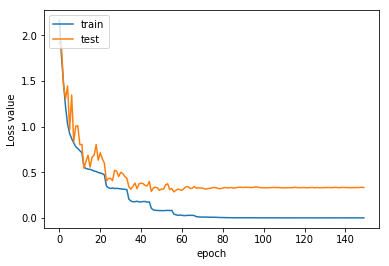

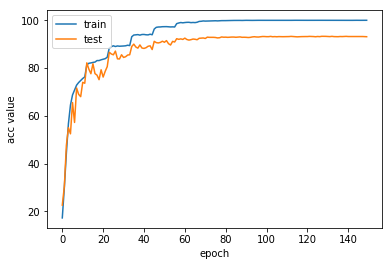

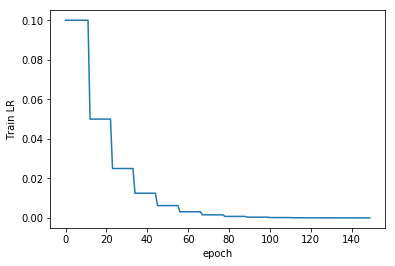

In [4]:
plot_history(history)